In [111]:
print("I Shyam Prasad",'\n',"AM.EN.U4CSE19164")

I Shyam Prasad 
 AM.EN.U4CSE19164


# Sentiment Analysis of Hotel reviews


**Problem statement**




Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged. And some times it becomes hard for hotels to clasify good and bad reviews.
With this dataset, consisting of 20k reviews crawled from Tripadvisor we are going to clasify whether a review is good or bad, if the customer is happy or unhappy.

**Dataset**

This data set is from Tripadvisor, World's largest travel platform. They collect hundreds of millions of traveller reviews and opinions from customers. This dataset consists of following features.

https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews


*   review
*   Rating















**Python Pakages**

In the older days, people used to perform Machine Learning tasks by manually coding all the algorithms and mathematical and 
statistical formula. This made the process time consuming, tedious and inefficient. But in the modern days, it is become 
very much easy and efficient compared to the olden days by various python libraries, frameworks, and modules. Today, Python 
is one of the most popular programming languages for this task and it has replaced many languages in the industry, one of 
the reason is its vast collection of libraries. Python libraries that used in Machine Learning are: 
 


*   Numpy
*   Pandas
*   Matplotlib
*   Seaborn
*   Sklearn
*   Nltk (stopwords, WordNetLemmatizer)
*   Regular Expression











In [37]:
#import and download modules and pakages.

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
import seaborn as sns


nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
pwd

'/content'

**Data Preparation**

Summarization: 


In [39]:
#loading the dataset and describing it.
df = pd.read_csv('/content/drive/MyDrive/datasets/tripadvisor_hotel_reviews.csv')
print(df.head())
print('\n\n')
print(df.describe().transpose())
print('\n\n')
df['Rating'].value_counts()


                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5



          count      mean      std  min  25%  50%  75%  max
Rating  20491.0  3.952223  1.23303  1.0  3.0  4.0  5.0  5.0





5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

**Data Visualization**

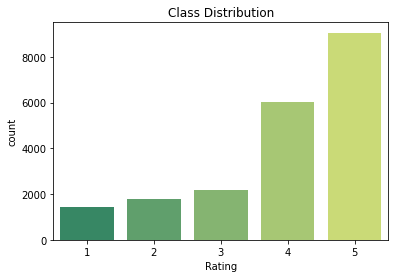

In [41]:

sns.countplot(x=df['Rating'],palette='summer')
plt.title('Class Distribution')
plt.show()

In [48]:
df1 = df.loc[(df.Rating < 3)]
print(df1)
df1 = df1.reset_index(drop=True)
sum(df1['Rating'].value_counts())
df1


                                                  Review  Rating
1      ok nothing special charge diamond member hilto...       2
10     poor value stayed monaco seattle july, nice ho...       2
15     horrible customer service hotel stay february ...       1
16     disappointed say anticipating stay hotel monac...       2
24     great location need internally upgrade advanta...       2
...                                                  ...     ...
20484  deceptive staff deceptive desk staff claiming ...       2
20485  not impressed unfriendly staff checked asked h...       2
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[3214 rows x 2 columns]


,Review,Rating
0,ok nothing special charge diamond member hilto...,2
1,"poor value stayed monaco seattle july, nice ho...",2
2,horrible customer service hotel stay february ...,1
3,disappointed say anticipating stay hotel monac...,2
4,great location need internally upgrade advanta...,2
...,...,...
3209,deceptive staff deceptive desk staff claiming ...,2
3210,not impressed unfriendly staff checked asked h...,2
3211,"ok just looks nice modern outside, desk staff ...",2
3212,hotel theft ruined vacation hotel opened sept ...,1


In [49]:
df2 = df.loc[(df.Rating == 5)]
df2 = df2.reset_index(drop=True)
df_pos = df2.loc[:len(df1)]
df_pos['Rating'].value_counts()
df_all = pd.concat([df1,df2],axis=0)

df_all = df_all.reset_index(drop=True)
df_all

,Review,Rating
0,ok nothing special charge diamond member hilto...,2
1,"poor value stayed monaco seattle july, nice ho...",2
2,horrible customer service hotel stay february ...,1
3,disappointed say anticipating stay hotel monac...,2
4,great location need internally upgrade advanta...,2
...,...,...
12263,best best reason affordable better hotels city...,5
12264,"night not trust not disappointed stay hotel, s...",5
12265,great play stay stay loyal inn package deal ha...,5
12266,great choice wife chose best western quite bit...,5


In [60]:
df_all['sentiment'] = np.where(df_all['Rating']== 5,"happy","unhappy")
df_all = df_all.sample(frac=1)
df_eng = df_all.reset_index(drop=True)
df_eng

,Review,Rating,sentiment
0,"bugs, say best thing resort beautiful beach gr...",2,unhappy
1,disappointing n't waste money booked hotel hus...,1,unhappy
2,hole dont hotel raised ground not seen arrived...,1,unhappy
3,great service read lot hotel tripadvisor certa...,5,happy
4,"water club best, wife just returned fantastic ...",5,happy
...,...,...,...
12263,"definitely come, happy stayed maya, service gr...",5,happy
12264,ripped bad service rooms lovely loft 523 bewar...,2,unhappy
12265,not good choice barcelona stayed princess sofi...,2,unhappy
12266,fabulous softest bed great location booked sof...,5,happy


we need some bias values as not many give bad feedback.

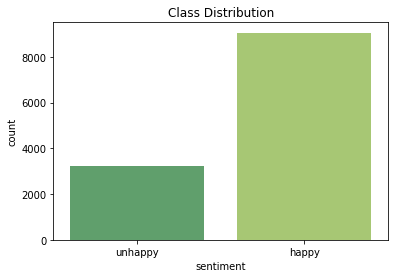

In [61]:

sns.countplot(x=df_eng['sentiment'],palette='summer')
plt.title('Class Distribution')
plt.show()

In [62]:
"""

Data Preprocessing: here we are tokenizing each sentence into words(tokens) and removing stopwords( eg. a, an, in...) because they are redundant.
we are stemming each words to get their normal form (e.g. wolves to wolf, stayed to stay) by using lemmatizer.

"""


from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
temp = []

# class model_func:
#   def __init__(self):


def text_preprocessing(df1):
  for i in df1:
    review = re.sub('[^a-zA-z]',' ',i)
    review = review.lower()
    review = review.split()
    review = [stemmer.lemmatize(word) for word in review if word not in  stop_words]
    review = ' '.join(review)
    temp.append(review)
  # df_clean = pd.DataFrame(temp, columns = ['Description'])
  # df_clean['Is_Response'] = df['Is_Response']
  return temp

def text_test_preprocessing(x):
    review = re.sub('[^a-zA-z]',' ',x)
    review = review.lower()
    review = review.split()
    review = [stemmer.lemmatize(word) for word in review if word not in  stop_words]
    review = ' '.join(review)
    return review

In [8]:
#Before Text Preprocessing
print(df_eng['Review'][0])

warning beware bahia principe written reviews time feel compelled speak mind went bahia principe punta cana 20-27 2006 honeymoon excited trip, booked trip apple vacations, used times going mexico turned great.we arrived pc airport apple rep waiting, trip airport resort 1/2 hour bit longer depending traffic, roads quite bumpy rough, no problem, check went smoothly, got room upgraded golden club villa 3 room decorated ballons flowers towel art bed bottle rum t-shirts fruit basket, far good thought, room bit warm no problem, upgraded n't big deal se, nice close pool beach, took train buffet days 15 min walk night mosquitos hungry, lazy took train runs middle oof resort 5 minutes so.in opinion resort beautiful, pools nice, rooms junior suites include jacuzzi albeit noisy jets n't work great, step tub/shower combination high beware, floor tile marble slippery, food good, yes little repetitious days quite good, wednesday night prime rib lobster night buffet, n't miss, did not speciality rest

In [9]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_eng['Review'], df_eng['sentiment'])


In [10]:
data2 = text_preprocessing(X_test)

In [11]:

#After Text Preprocessing
print(data2[0])

loved meurice returned stay meurice treated able upgrade aniversary gave room balcony overlooking garden eiffel tower view sent bottle champagne treat definitely stay location great walked package obtained website included breakfast breakfast served star restaurant service incredible food great felt like dinner


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=5000)

train_vec = vectorizer.fit_transform(X_train)
test_vec = vectorizer.transform(X_test)

In [22]:
print(train_vec.shape)
print(test_vec.shape)
print(len(vectorizer.vocabulary_))

(9201, 5000)
(3067, 5000)
5000


In [14]:
from sklearn.linear_model import LogisticRegression

clsf = LogisticRegression()
clsf.fit(train_vec,y_train)
y_pred = clsf.predict(test_vec)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2245   13]
 [  96  713]]
              precision    recall  f1-score   support

       happy       0.96      0.99      0.98      2258
     unhappy       0.98      0.88      0.93       809

    accuracy                           0.96      3067
   macro avg       0.97      0.94      0.95      3067
weighted avg       0.97      0.96      0.96      3067



In [68]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test,y_pred)
print('accuracy of logistic regression',accuracy1,'\n')

accuracy of logistic regression 0.9028366481904141 



In [69]:
#predicting for custom user input review

sample1 =[]
sample = "this hotel normal "
sample1.append(text_test_preprocessing(sample))
clsf.predict(vectorizer.transform(sample1))


array(['happy'], dtype=object)

In [70]:
#using k nearest nighbour
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

l =[]
KList = [1,3,5,7,9,11,13,15,21,27]
for k in KList:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(train_vec,y_train)
  y_pred = classifier.predict(test_vec)
  a = accuracy_score(y_test,y_pred)
  l.append(a)
accuracy2 = max(l)
print('accuracy of KNN',accuracy2,'\n')

accuracy of KNN 0.9028366481904141 



In [71]:
#using support vector machine

from sklearn.svm import SVC
svm = SVC(C=1, kernel='linear', random_state=1)
svm.fit(train_vec,y_train)
y_pred = svm.predict(test_vec)

In [72]:
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_test,y_pred)
print('accuracy of SVM',accuracy3,'\n')

accuracy of SVM 0.9719595696119987 



In [73]:
print("average of accuracies ",(accuracy1+accuracy2+accuracy3)/3)

average of accuracies  0.9258776219976089


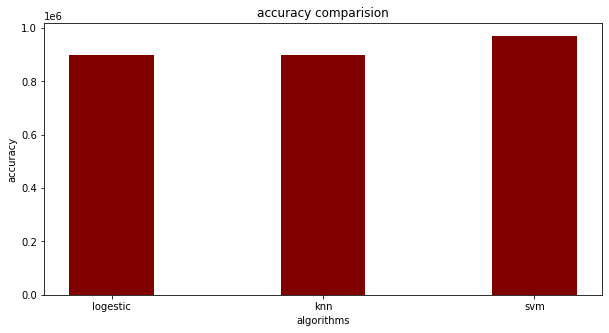

In [110]:
data = {'logestic':accuracy1, 'knn':accuracy2, 'svm':accuracy3}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("algorithms")
plt.ylabel("accuracy")
plt.title("accuracy comparision")
plt.show()